# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [3]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv("ames.csv", index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [9]:
# Your code here - drop columns with missing data
# Drop all columns with missing data
ames_cleaned = ames.dropna(axis=1)

# Display the shape of the dataframe and the first few rows to confirm the changes
print(ames_cleaned.shape)
ames_cleaned.head()

(1460, 61)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Ames Housing Dataset
ames_cleaned = pd.read_csv('ames.csv', index_col=0).dropna(axis=1)

# Continuous Numeric Predictor: GrLivArea
continuous_numeric_predictor = ames_cleaned['GrLivArea']

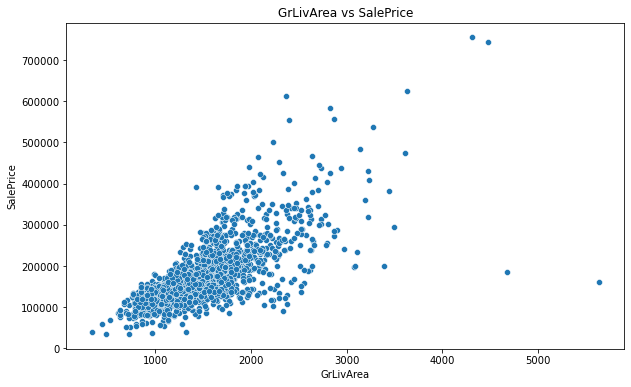

In [18]:
# Continuous Numeric Predictor: GrLiveArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=ames_cleaned)
plt.title('GrLivArea vs SalePrice')
plt.show()

### Discrete Numeric Predictor

In [19]:
# Your code here - discrete numeric predictor
discrete_numeric_predictor = ames_cleaned['OverallQual']

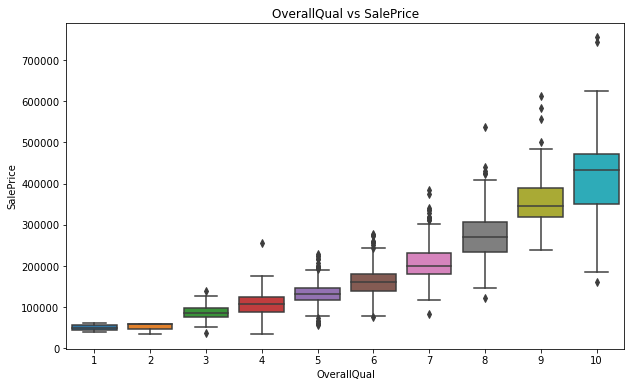

In [20]:
# Discrete Numeric Predictor: OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=ames_cleaned)
plt.title('OverallQual vs SalePrice')
plt.show()

### String Categorical Predictor

In [21]:
# Your code here - string categorical predictor
string_categorical_predictor = ames_cleaned['LotShape']

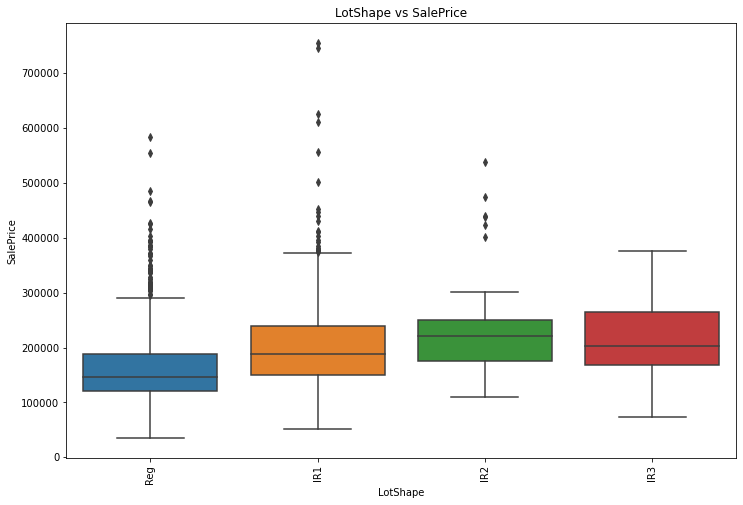

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='LotShape', y='SalePrice', data=ames_cleaned)
plt.xticks(rotation=90)
plt.title('LotShape vs SalePrice')
plt.show()

### Discrete Categorical Predictor

In [23]:
# Your code here - discrete categorical predictor
discrete_categorical_predictor = ames_cleaned['MSSubClass']

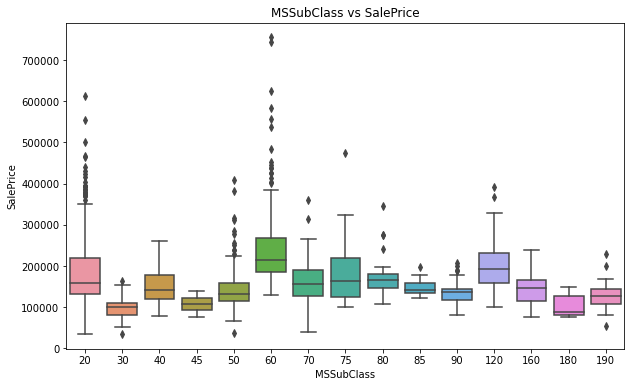

In [24]:
# Discrete Categorical Predictor: MSSubclass vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=ames_cleaned)
plt.title('MSSubClass vs SalePrice')
plt.show()

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [29]:
# Your code here - prepare X and y, including one-hot encoding
# Choose the predictors and the target
X = ames_cleaned[['GrLivArea', 'OverallQual', 'LotShape']]
y = ames_cleaned['SalePrice']
X

,GrLivArea,OverallQual,LotShape
Id,,,
1,1710,7,Reg
2,1262,6,Reg
3,1786,7,IR1
4,1717,7,IR1
5,2198,8,IR1
...,...,...,...
1456,1647,6,Reg
1457,2073,6,Reg
1458,2340,7,Reg


In [30]:
# Your answer here - which category or categories were dropped?
X = pd.get_dummies(X, columns=["LotShape"], drop_first=True, dtype=int)
X

,GrLivArea,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,
1,1710,7,0,0,1
2,1262,6,0,0,1
3,1786,7,0,0,0
4,1717,7,0,0,0
5,2198,8,0,0,0
...,...,...,...,...,...
1456,1647,6,0,0,1
1457,2073,6,0,0,1
1458,2340,7,0,0,1


In [31]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     759.4
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:00:10   Log-Likelihood:                -17607.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1454   BIC:                         3.526e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -8.92e+04   5574.151    -16.002   

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

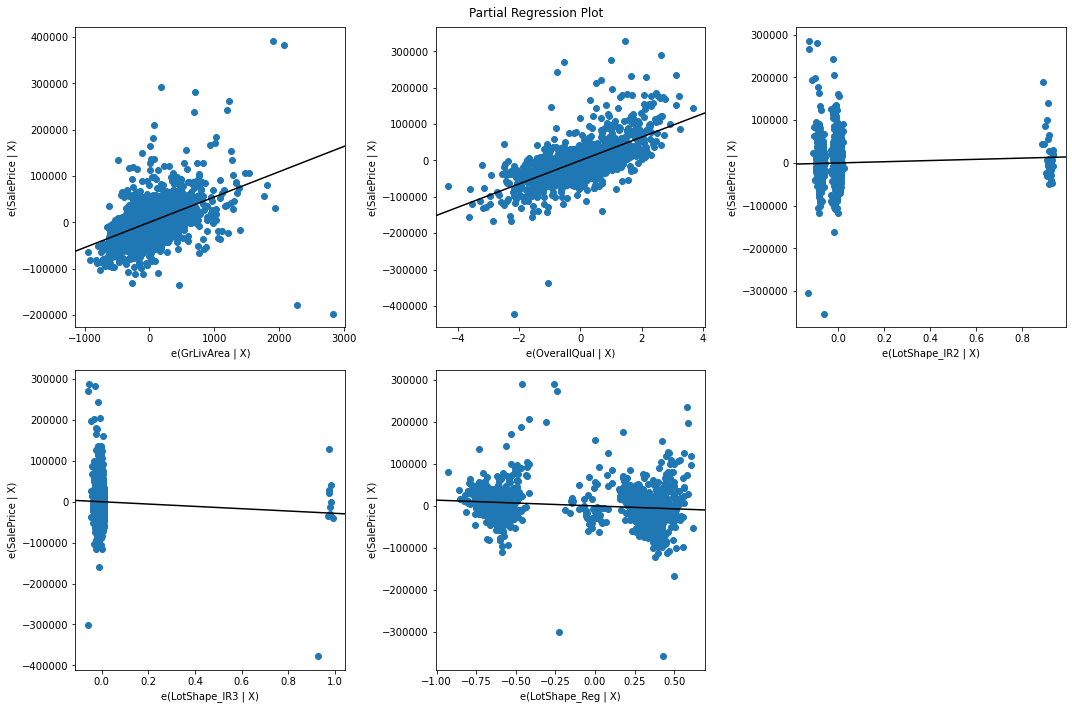

In [32]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [33]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

28396.050798992303

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?


"""
Our model is statistically significant overall, and explains about 72% of the
variance in SalePrice. On average it is off by about $28k in its predictions
of home price.

All of our coefficients are statistically significant

So we can say that:

const: When above-grade living area is 0, overall quality is 0, and lot shape
       is slightly irregular, we would expect a home sale price of -$89k
       
GrLivArea: For each increase of 1 sqft in above-grade living area, we see an
           associated increase of about $55 in sale price

OverallQual: For each increase of 1 in overall quality, we see an associated
             increase of about $32k in sale price

LotShape_IR2: Compared to a slightly irregular lot shape, we see an associated
              increase of about $14k for a moderately irregular lot shape

LotShape_IR3: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $28k for an irregular lot shape

LotShape_Reg: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $14k for a regular lot shape

Looking at the partial regression plots, the dummy variables look fairly
different from the other variables. They tend to have two clusters rather than
a continuous "cloud". Given the relatively small numbers in IR2 and IR3, I
wonder if a better model would have these binned together with IR1 instead.
"""

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.